In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
# import sys
# sys.path.insert(0, '../src')

# %load_ext autoreload
# %autoreload 2
# from src import modules

In [2]:
annual_crime = pd.read_pickle('../data/pickled/annual_crime.pkl')
monthly_crime = pd.read_pickle('../data/pickled/monthly_crime.pkl')

In [3]:
annual_crime.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,624.935484,580.225806,572.838710,536.645161,517.709677,586.774194,609.064516,625.580645,617.129032
1,571.392857,523.607143,528.172414,501.321429,487.892857,570.750000,596.000000,609.178571,608.000000
2,584.096774,545.870968,534.290323,521.838710,502.451613,579.451613,587.870968,623.741935,610.161290
3,591.600000,547.333333,542.533333,523.300000,513.466667,563.466667,619.000000,622.766667,634.200000
4,570.935484,545.903226,563.483871,534.612903,538.548387,577.096774,612.967742,624.709677,639.419355


In [4]:
monthly_crime.head()

,crime_count
Date,
2010-01-01,624.935484
2010-02-01,571.392857
2010-03-01,584.096774
2010-04-01,591.600000
2010-05-01,570.935484


### Modeling on monthly crime dataframe

#### Trend Analysis in Data

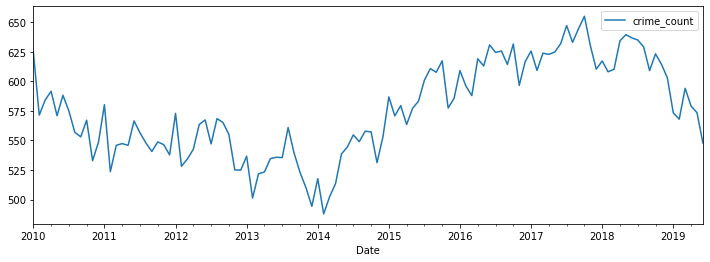

In [5]:
monthly_crime.plot(figsize=(12,4))

From the plot, there seems to be a some periodic trend and some seasonality, also a trend that goes up from 2014 to 2018 and a falling trend from there on. Although, we only have data on the first eight months of 2019, data collection during 2019 seems to be lacking or there truly was falling numbers of crime

Due to the presence of trend, our data is not stationary, the mean is defintely not constant. We can look at the rolling statistics (rolling mean and roilling standard deviation) to confirm.

#### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean at any point in time **$t$**, we can take the average/variance of the **$w$** last time periods. **$w$** is then known as the window size.

In [6]:
roll_mean = monthly_crime.rolling(window=8, center=False).mean()
roll_std = monthly_crime.rolling(window=8, center=False).std()

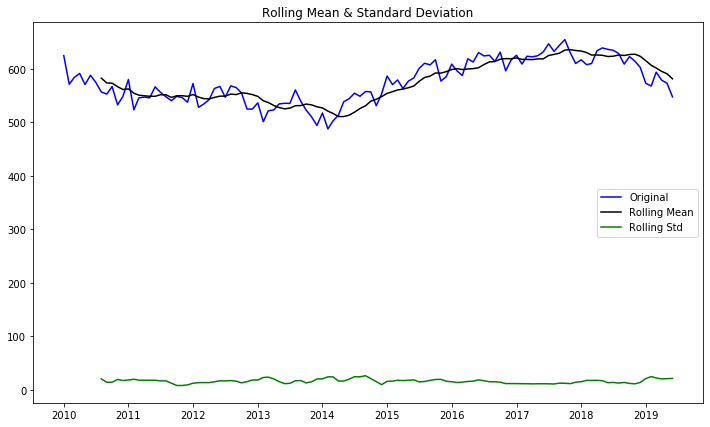

In [7]:
fig = plt.figure(figsize=(12,7))
plt.plot(monthly_crime, color='blue', label='Original')
plt.plot(roll_mean, color='black', label='Rolling Mean')
plt.plot(roll_std, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The black and green lines represent the rolling mean and rolling standard deviations. In the plot we can see that mean is not constant over time, so we can confirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

In [8]:
X = monthly_crime['crime_count']
X = X[np.logical_not(np.isnan(X))]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=546.127441, mean2=605.584653
variance1=646.720180, variance2=750.762978


As you can see the mean is not constant and the variance is also changing

In [9]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(monthly_crime)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.861812
p-value                          0.350234
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

At a 95% confidence, we fail to reject the null that the monthly crime data is not stationary.

In [10]:
monthly_crime.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', length=114, freq='MS')

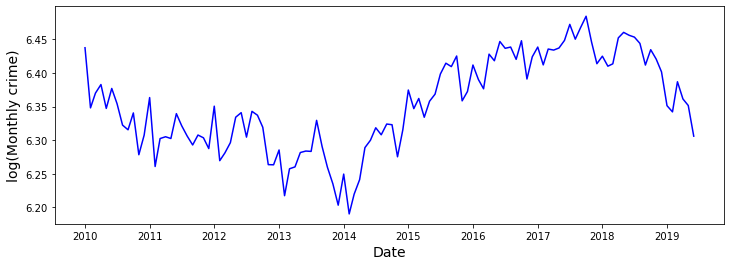

In [11]:
data = pd.Series(np.log(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

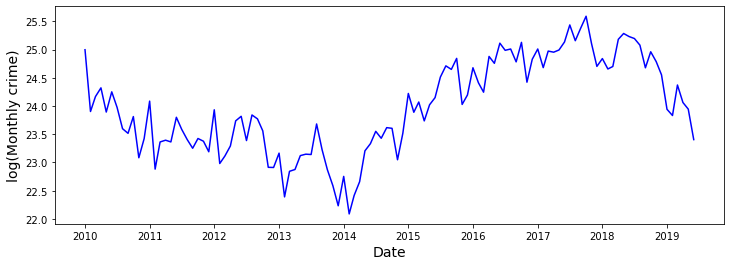

In [12]:
data1 = pd.Series(np.sqrt(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data1, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

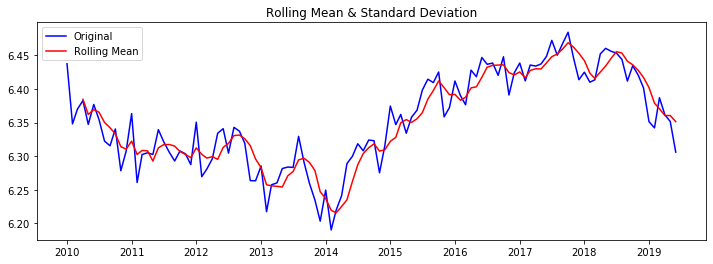

In [13]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

Date
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01   -0.001825
2010-05-01   -0.014786
2010-06-01    0.007714
2010-07-01   -0.011086
2010-08-01   -0.027842
2010-09-01   -0.026851
2010-10-01    0.007381
2010-11-01   -0.035882
2010-12-01   -0.002966
2011-01-01    0.041000
2011-02-01   -0.041729
2011-03-01   -0.006116
Freq: MS, Name: crime_count, dtype: float64

In [15]:
data_minus_roll_mean.dropna(inplace=True)

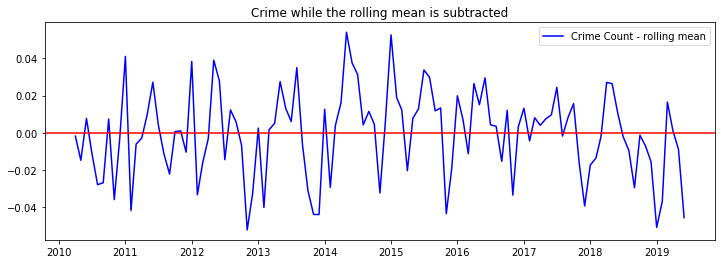

In [16]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [17]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.319125
p-value                         0.620378
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

p value is greater than p critical at 0.05. Fail to Reject null of Not Stationary. The rolling mean subtracted log crime count data is not stationary

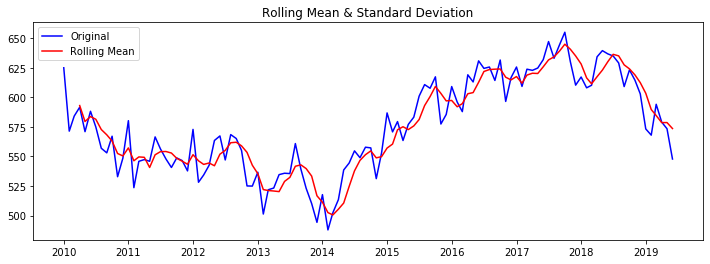

In [18]:
roll_mean = monthly_crime.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(monthly_crime, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
# Subtract the moving average from the original data
data_minus_roll_mean = monthly_crime - roll_mean
data_minus_roll_mean.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,-1.406279
2010-05-01,-8.570795
2010-06-01,4.466935
2010-07-01,-6.473925
2010-08-01,-15.831989
2010-09-01,-15.226344


In [20]:
data_minus_roll_mean.dropna(inplace=True)

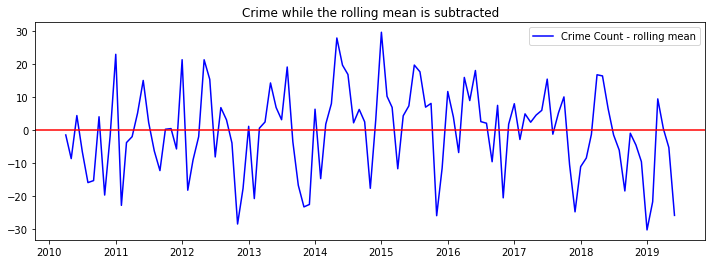

In [21]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [22]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.194470
p-value                         0.675970
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

Logged and non logged has no effect once using the rolling mean subtraction. Still not stationary.

In [23]:
crime_diff = monthly_crime.diff(periods=1)
crime_diff.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,-53.542627
2010-03-01,12.703917
2010-04-01,7.503226
2010-05-01,-20.664516
2010-06-01,17.231183
2010-07-01,-13.231183
2010-08-01,-18.032258
2010-09-01,-3.869892


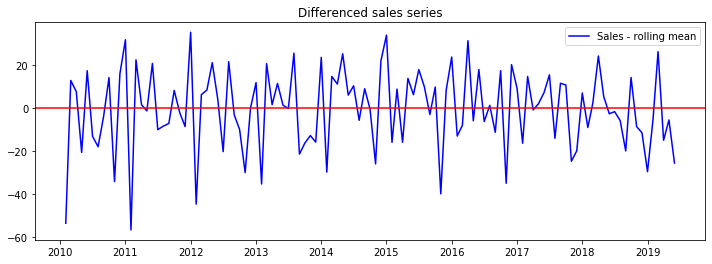

In [24]:
fig = plt.figure(figsize=(12,4))
plt.plot(crime_diff, color='blue',label='Sales - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [25]:
crime_diff.dropna(inplace=True)

In [26]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(crime_diff)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.675236
p-value                          0.443915
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

### Seasonal Decomposition

Breaking down the changes over time in trend, seasonality and residual (random/noise)

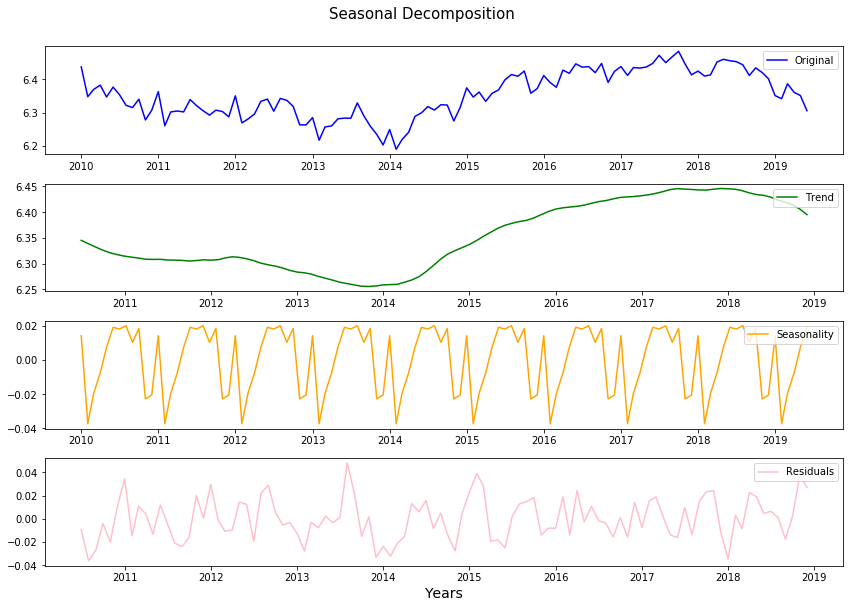

In [27]:
# Importing seasonal decompose object
from statsmodels.tsa.seasonal import seasonal_decompose

# Instantiating decomposition object
decomposition = seasonal_decompose(np.log(monthly_crime))

# Gather the trend, seasonality, and residuals for the monthly crime data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.suptitle('Seasonal Decomposition', y = 1.05, size = 15)

#plotting original data in a subplot and showing legend
plt.subplot(411)
plt.plot(np.log(monthly_crime), label='Original', color='blue')
plt.legend(loc=1)

#plotting decomposed trend in a subplot and showing legend
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc=1)

#plotting decomposed seasonality in a subplot and showing legend
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='orange')
plt.legend(loc=1)
plt.subplot(414)

#plotting decomposed residual or noise in a subplot and showing legend
plt.plot(residual, label='Residuals', color='pink')
plt.xlabel('Years', size = 14)
plt.legend(loc=1)
plt.tight_layout()

plt.savefig('../visualizations/LA Crime- Time Series Seasonal Decomposition')

In [28]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

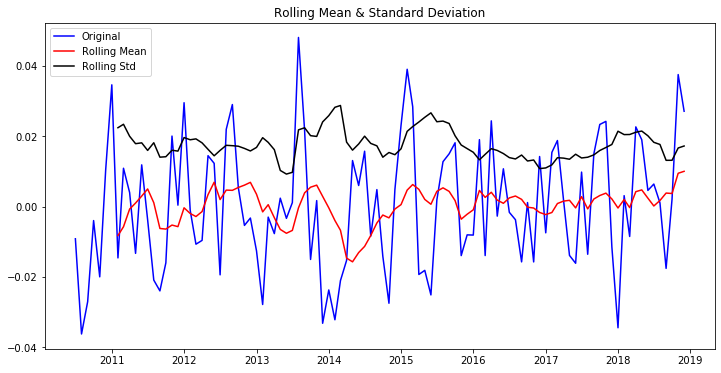

Results of Dickey-Fuller Test: 

Test Statistic                -6.995909e+00
p-value                        7.534967e-10
#Lags Used                     3.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


In [29]:
# Drop missing values from residuals 
crime_log_decompose = residual
crime_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(crime_log_decompose)

Residuals are stationary at a 95% confidence

>The p statistic is significant and below 0.05 . So it seems reasonable to assume this time series is stationary.

*"In time series context, residuals must be stationary in order to avoid spurious regressions (Woolridge, 2012), if there are no properties of
stationarity among the residuals, then basically our results tend to produce
fake relationships in our model."*

#### Comparing the crime count time series, with the time series of a lag of one

In [30]:
crime_shift_1 = monthly_crime.shift(periods=1)
lag_1 = pd.concat([crime_shift_1, monthly_crime], axis=1)
lag_1.corr()

,crime_count,crime_count
crime_count,1.00000,0.88922
crime_count,0.88922,1.00000


In [31]:
for i in range(1,14):
    crime_shift = monthly_crime.shift(periods=i)
    lag = pd.concat([crime_shift, monthly_crime], axis=1)
    print('lag {}'.format(i), lag.corr())

lag 1              crime_count  crime_count
crime_count      1.00000      0.88922
crime_count      0.88922      1.00000
lag 2              crime_count  crime_count
crime_count     1.000000     0.857452
crime_count     0.857452     1.000000
lag 3              crime_count  crime_count
crime_count     1.000000     0.839176
crime_count     0.839176     1.000000
lag 4              crime_count  crime_count
crime_count     1.000000     0.786284
crime_count     0.786284     1.000000
lag 5              crime_count  crime_count
crime_count     1.000000     0.759595
crime_count     0.759595     1.000000
lag 6              crime_count  crime_count
crime_count     1.000000     0.726668
crime_count     0.726668     1.000000
lag 7              crime_count  crime_count
crime_count     1.000000     0.711975
crime_count     0.711975     1.000000
lag 8              crime_count  crime_count
crime_count     1.000000     0.689913
crime_count     0.689913     1.000000
lag 9              crime_count  crime_co

autocorrelation highest at lag 2 and lag 13 also visible in the peaks in the autocorrelation plot below

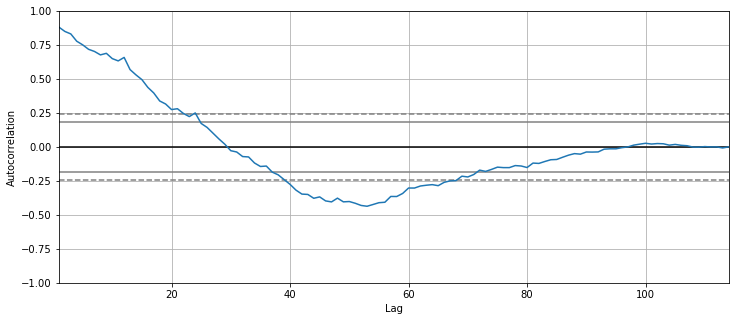

In [32]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(monthly_crime);

From the plot, we can see that there are peaks at intervals of 12. The statistical significance falls around 15 to 16 lags.

MA(k)--- ACF strong autocorrelation till lag 16, with peaks at lag 2 and 12

AR(k)--- ACF stong to a lag of 12

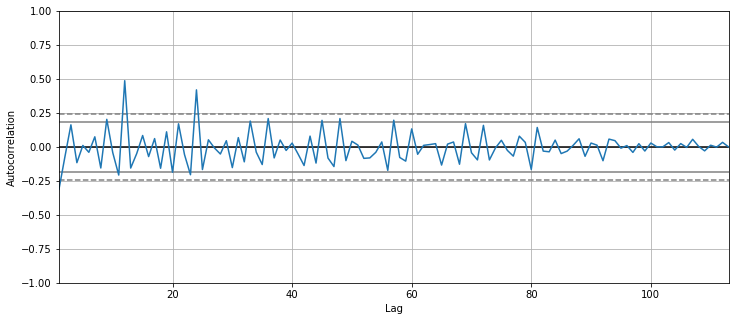

In [33]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(crime_diff);

The ACF on the (1)differenced data seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 12 seems consistently statistically significant, while it decays for longer time lags!

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. MA(k), k 60?

we would expect the ACF for the AR(k) process to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect is weakened.--- strong to a lag of 48 or 60?

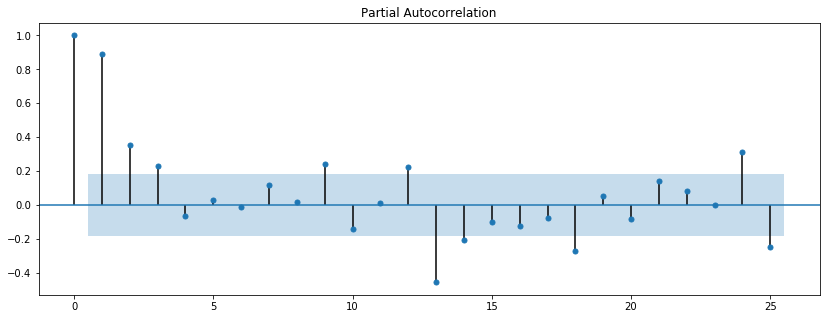

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(monthly_crime, lags=25);

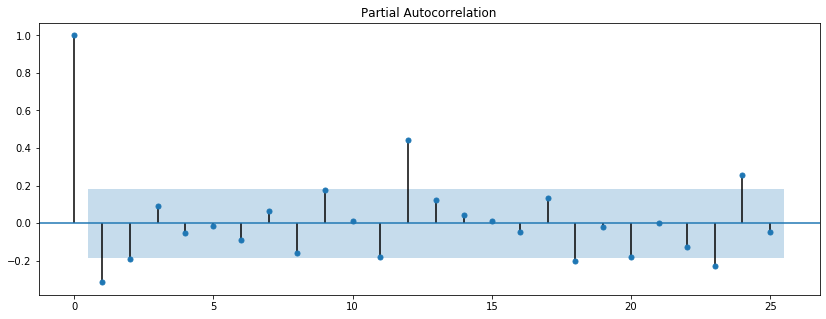

In [35]:
plot_pacf(crime_diff, lags=25);

### AR Model--- ARMA(#,0)

In [36]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(1, 0)   Log Likelihood                -492.921
Method:                       css-mle   S.D. of innovations             18.139
Date:                Tue, 08 Dec 2020   AIC                            991.843
Time:                        00:18:32   BIC                           1000.051
Sample:                    01-01-2010   HQIC                           995.174
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               577.1548     14.364     40.180      0.000     549.001     605.309
ar.L1.crime_count     0.8892      0.042     21.322      0.000       0.807       0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1246           +0.0000j            1.1246            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -487.909
Method:                       css-mle   S.D. of innovations             17.348
Date:                Tue, 08 Dec 2020   AIC                            983.819
Time:                        00:18:32   BIC                            994.763
Sample:                    01-01-2010   HQIC                           988.261
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               577.3190     17.683     32.649      0.000     542.662     611.976
ar.L1.crime_count     0.6162      0.093      6.615      0.000       0.434       0.799
ar.L2.crime_count     0.3019      0.093      3.242      0.001       0.119       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0660           +0.0000j            1.0660            0.0000
AR.2           -3.1072           +0.0000j            3.1072            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(12,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(12, 0)   Log Likelihood                -479.177
Method:                       css-mle   S.D. of innovations             15.974
Date:                Tue, 08 Dec 2020   AIC                            986.353
Time:                        00:18:37   BIC                           1024.660
Sample:                    01-01-2010   HQIC                          1001.900
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                578.5147     20.667     27.992      0.000     538.008     619.022
ar.L1.crime_count      0.6161      0.095      6.473      0.000       0.430       0.803
ar.L2.crime_count      0.1707      0.112      1.528      0.127      -0.048       0.390
ar.L3.crime_count      0.2353      0.111      2.115      0.034       0.017       0.453
ar.L4.crime_count     -0.1384      0.113     -1.223      0.221      -0.360       0.083
ar.L5.crime_count      0.0148      0.116      0.128      0.898      -0.212       0.242
ar.L6.crime_count     -0.1103      0.113     -0.979      0.328      -0.331       0.111
ar.L7.crime_count      0.1224      0.114      1.072      0.284      -0.101       0.346
ar.L8.crime_count     -0.0677      0.115     -0.590      0.555      -0.293       0.157
ar.L9.crime_count      0.2357      0.113      2.078      0.038       0.013       0.458
ar.L10.crime_count    -0.2096      0.114     -1.832      0.067      -0.434       0.015
ar.L11.crime_count    -0.1402      0.115     -1.217      0.224      -0.366       0.086
ar.L12.crime_count     0.2133      0.099      2.160      0.031       0.020       0.407
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9671           -0.5200j            1.0980           -0.4215
AR.2            -0.9671           +0.5200j            1.0980            0.4215
AR.3            -1.3810           -0.0000j            1.3810           -0.5000
AR.4            -0.5081           -0.9454j            1.0733           -0.3285
AR.5            -0.5081           +0.9454j            1.0733            0.3285
AR.6             0.0884           -1.0998j            1.1034           -0.2372
AR.7             0.0884           +1.0998j            1.1034            0.2372
AR.8             0.7844           -0.8860j            1.1833           -0.1347
AR.9             0.7844           +0.8860j            1.1833            0.1347
AR.10            1.1072           -0.4097j            1.1806           -0.0564
AR.11            1.1072           +0.4097j            1.1806            0.0564
AR.12            1.0286           -0.0000j            1.0286           -0.0000
------------------------------------------------------------------------------
"""

In [39]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(1, 0)   Log Likelihood                -484.626
Method:                       css-mle   S.D. of innovations             17.624
Date:                Tue, 08 Dec 2020   AIC                            975.251
Time:                        00:18:39   BIC                            983.433
Sample:                    02-01-2010   HQIC                           978.572
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5072      1.241     -0.409      0.683      -2.940       1.925
ar.L1.crime_count    -0.3395      0.093     -3.669      0.000      -0.521      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9457           +0.0000j            2.9457            0.5000
-----------------------------------------------------------------------------
"""

In [40]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(2, 0)   Log Likelihood                -482.233
Method:                       css-mle   S.D. of innovations             17.248
Date:                Tue, 08 Dec 2020   AIC                            972.466
Time:                        00:18:39   BIC                            983.376
Sample:                    02-01-2010   HQIC                           976.893
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4261      1.006     -0.424      0.672      -2.398       1.546
ar.L1.crime_count    -0.4096      0.096     -4.263      0.000      -0.598      -0.221
ar.L2.crime_count    -0.2118      0.096     -2.213      0.027      -0.399      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9669           -1.9458j            2.1728           -0.3234
AR.2           -0.9669           +1.9458j            2.1728            0.3234
-----------------------------------------------------------------------------
"""

In [41]:
## Instantiate an AR(1) model to the simulated data
# mod_arma = ARMA(crime_diff, order=(12,0))
# res_arma = mod_arma.fit()
# res_arma.summary()

## Did not converge at p=12

## MA Models == ARMA(0, #)

In [42]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 1)   Log Likelihood                -538.142
Method:                       css-mle   S.D. of innovations             27.058
Date:                Tue, 08 Dec 2020   AIC                           1082.283
Time:                        00:18:39   BIC                           1090.492
Sample:                    01-01-2010   HQIC                          1085.615
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               575.9599      4.420    130.307      0.000     567.297     584.623
ma.L1.crime_count     0.7507      0.052     14.405      0.000       0.649       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3321           +0.0000j            1.3321            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,2))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 2)   Log Likelihood                -525.194
Method:                       css-mle   S.D. of innovations             24.151
Date:                Tue, 08 Dec 2020   AIC                           1058.389
Time:                        00:18:39   BIC                           1069.333
Sample:                    01-01-2010   HQIC                          1062.830
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               576.2458      5.125    112.446      0.000     566.202     586.290
ma.L1.crime_count     0.8519      0.091      9.347      0.000       0.673       1.030
ma.L2.crime_count     0.4283      0.069      6.184      0.000       0.293       0.564
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9944           -1.1601j            1.5279           -0.3628
MA.2           -0.9944           +1.1601j            1.5279            0.3628
-----------------------------------------------------------------------------
"""

In [44]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,12))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(0, 12)   Log Likelihood                -480.095
Method:                       css-mle   S.D. of innovations             15.990
Date:                Tue, 08 Dec 2020   AIC                            988.189
Time:                        00:18:49   BIC                           1026.496
Sample:                    01-01-2010   HQIC                          1003.736
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                575.8321      9.528     60.434      0.000     557.157     594.507
ma.L1.crime_count      0.6796      0.100      6.826      0.000       0.484       0.875
ma.L2.crime_count      0.6770      0.132      5.126      0.000       0.418       0.936
ma.L3.crime_count      0.7998      0.157      5.082      0.000       0.491       1.108
ma.L4.crime_count      0.6701      0.175      3.840      0.000       0.328       1.012
ma.L5.crime_count      0.5331      0.183      2.914      0.004       0.174       0.892
ma.L6.crime_count      0.5263      0.184      2.858      0.004       0.165       0.887
ma.L7.crime_count      0.4669      0.161      2.904      0.004       0.152       0.782
ma.L8.crime_count      0.2665      0.138      1.926      0.054      -0.005       0.538
ma.L9.crime_count      0.3320      0.111      2.979      0.003       0.114       0.550
ma.L10.crime_count     0.0754      0.098      0.767      0.443      -0.117       0.268
ma.L11.crime_count     0.1919      0.137      1.402      0.161      -0.076       0.460
ma.L12.crime_count     0.3812      0.110      3.455      0.001       0.165       0.597
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1            -1.0951           -0.2063j            1.1144           -0.4704
MA.2            -1.0951           +0.2063j            1.1144            0.4704
MA.3            -0.7872           -0.6738j            1.0361           -0.3873
MA.4            -0.7872           +0.6738j            1.0361            0.3873
MA.5            -0.3040           -1.0255j            1.0696           -0.2959
MA.6            -0.3040           +1.0255j            1.0696            0.2959
MA.7             0.2141           -1.0145j            1.0368           -0.2169
MA.8             0.2141           +1.0145j            1.0368            0.2169
MA.9             0.6820           -0.8377j            1.0802           -0.1413
MA.10            0.6820           +0.8377j            1.0802            0.1413
MA.11            1.0384           -0.5411j            1.1710           -0.0765
MA.12            1.0384           +0.5411j            1.1710            0.0765
------------------------------------------------------------------------------
"""

In [45]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(0, 1)   Log Likelihood                -483.044
Method:                       css-mle   S.D. of innovations             17.374
Date:                Tue, 08 Dec 2020   AIC                            972.089
Time:                        00:18:51   BIC                            980.271
Sample:                    02-01-2010   HQIC                           975.409
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4108      0.983     -0.418      0.676      -2.336       1.515
ma.L1.crime_count    -0.4036      0.089     -4.534      0.000      -0.578      -0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.4776           +0.0000j            2.4776            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX MODEL

In [46]:
monthly_crime.tail()

,crime_count
Date,
2019-02-01,568.000000
2019-03-01,594.064516
2019-04-01,579.033333
2019-05-01,573.419355
2019-06-01,547.818182


In [47]:
X = monthly_crime.index
y = monthly_crime['crime_count']

train_set = monthly_crime.loc['2010-01-01':'2017-12-31']
test_set = monthly_crime.loc['2018-01-01' : ]

X_train, X_test = train_set.index , test_set.index
y_train, y_test = train_set['crime_count'] , test_set['crime_count']

In [48]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [51]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value

ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_traino,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [50]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

TypeError: reduction operation 'argmin' not allowed for this dtype

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(y_traino, 
                                        order=(0, 2, 2), 
                                        seasonal_order=(2, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()
# .tables[1]

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 9))
plt.show()

### from canvas lesson

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Checking for these assumptions from diagnostics plots:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). There is a good indication that the residuals are close to normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) weakly follows the linear trend of the samples taken from a standard normal distribution with N(0, 1).There is fair indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start='2018-01-01', end='2019-06-30',dynamic=False)
# start='2018-01-01', end='2019-06-30'
pred_conf = pred.conf_int()
pred_conf

In [ ]:
# Plot real vs predicted values along with confidence interval

# rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = monthly_crime['2017-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
Crime_forecasted = pred.predicted_mean
Crime_truth = y_test

# Compute the mean square error
mse = np.sqrt(((Crime_forecasted - Crime_truth)**2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals
ax = monthly_crime.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')

plt.legend()
plt.show()